The questions about this dataset
1. Ngân sách cao hơn có nghĩa là mức độ phổ biến cao hơn ? Có mối quan hệ chính thức không ?
2. Thời gian chạy có ảnh hưởng đến số phiếu bầu và mức độ phổ biến không ?
3. Mức độ phổ biến cao hơn đồng nghĩa việc lợi nhuận cao hơn ?
4. Tính năng nào liên quan đến 10 phim doanh thu hàng đầu
5. Thể loại nào được yêu thích nhất từ năm này qua năm khác ?

In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [108]:
df = pd.read_csv('tmdb-movies.csv')
df.head()

id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      http://www.jurassicworld.com/   Colin Trevorrow   
1                        http://www.madmaxmovie.com/     George Miller   
2     http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   
3  http://www.starwars.com/films/star-wars-episod...       J.J. Abrams   
4                           http://www.furious7.com/         James Wan   

                         tagline  ...  \
0              The park is open.  ...   
1             What a Lovely Day.  ...   
2     One Choice Can Destroy You  ...   
3  Every generation has a story.  ...   
4            Vengeance Hits Home  ...   

                                            overview runtime  \
0  Twenty-two years after the events of Jurassic ...     124   
1  An apocalyptic story set in the furthest reach...     120   
2  Beatrice Prior must confront her inner demons ...     119   
3  Thirty years after defeating the Galactic Empi...     136   
4  Deckard Shaw seeks revenge against Dominic Tor...     137   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   
3   Action|Adventure|Science Fiction|Fantasy   
4                      Action|Crime|Thriller   

                                production_companies release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15       5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15       6185   
2  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15       2480   
3          Lucasfilm|Truenorth Productions|Bad Robot     12/15/15       5292   
4  Universal Pictures|Original Film|Media Rights ...       4/1/15       2947   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  
2           6.3          2015  1.012000e+08  2.716190e+08  
3           7.5          2015  1.839999e+08  1.902723e+09  
4           7.3          2015  1.747999e+08  1.385749e+09  

[5 rows x 21 columns]

In [109]:
# Kiểm tra số hàng số cột của data
df.shape

(10866, 21)

In [111]:
# Kiểm tra các loại dữ liệu
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [112]:
# Kiểm tra số lượng từng cột của các giá trị duy nhất
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [113]:
# Giá trị thống kê dữ liệu
df.describe()

id    popularity        budget       revenue       runtime  \
count   10866.000000  10866.000000  1.086600e+04  1.086600e+04  10866.000000   
mean    66064.177434      0.646441  1.462570e+07  3.982332e+07    102.070863   
std     92130.136561      1.000185  3.091321e+07  1.170035e+08     31.381405   
min         5.000000      0.000065  0.000000e+00  0.000000e+00      0.000000   
25%     10596.250000      0.207583  0.000000e+00  0.000000e+00     90.000000   
50%     20669.000000      0.383856  0.000000e+00  0.000000e+00     99.000000   
75%     75610.000000      0.713817  1.500000e+07  2.400000e+07    111.000000   
max    417859.000000     32.985763  4.250000e+08  2.781506e+09    900.000000   

         vote_count  vote_average  release_year    budget_adj   revenue_adj  
count  10866.000000  10866.000000  10866.000000  1.086600e+04  1.086600e+04  
mean     217.389748      5.974922   2001.322658  1.755104e+07  5.136436e+07  
std      575.619058      0.935142     12.812941  3.430616e+07  1.446325e+08  
min       10.000000      1.500000   1960.000000  0.000000e+00  0.000000e+00  
25%       17.000000      5.400000   1995.000000  0.000000e+00  0.000000e+00  
50%       38.000000      6.000000   2006.000000  0.000000e+00  0.000000e+00  
75%      145.750000      6.600000   2011.000000  2.085325e+07  3.369710e+07  
max     9767.000000      9.200000   2015.000000  4.250000e+08  2.827124e+09

In [114]:
# In thông tin của dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [115]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [116]:
# Xóa những cột không dùng
df.drop(['id','imdb_id', 'homepage','overview'],axis=1,inplace=True)

# Xử lý dữ liệu bị thiếu
df['cast'].fillna('mising',inplace=True)
df['director'].fillna('missing',inplace=True)
df['tagline'].fillna('missing', inplace=True)
df['keywords'].fillna('missing', inplace=True)
df['genres'].fillna('missing',inplace=True)
df['production_companies'].fillna('missing', inplace=True)
df['budget'] = df['budget'].replace(0, np.NAN)

In [68]:
df.isnull().sum()

popularity                 0
budget                  5696
revenue                    0
original_title             0
cast                       0
director                   0
tagline                    0
keywords                   0
runtime                    0
genres                     0
production_companies       0
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [117]:
# Kiểm tra xem có bị lặp lại không
df.duplicated().sum()

1

In [70]:
# Xóa đi những dữ liệu bị trùng
df.drop_duplicates(inplace = True)

df.duplicated().sum()

0

array([[<AxesSubplot: title={'center': 'popularity'}>,
        <AxesSubplot: title={'center': 'budget'}>,
        <AxesSubplot: title={'center': 'revenue'}>],
       [<AxesSubplot: title={'center': 'runtime'}>,
        <AxesSubplot: title={'center': 'vote_count'}>,
        <AxesSubplot: title={'center': 'vote_average'}>],
       [<AxesSubplot: title={'center': 'release_year'}>,
        <AxesSubplot: title={'center': 'budget_adj'}>,
        <AxesSubplot: title={'center': 'revenue_adj'}>]], dtype=object)

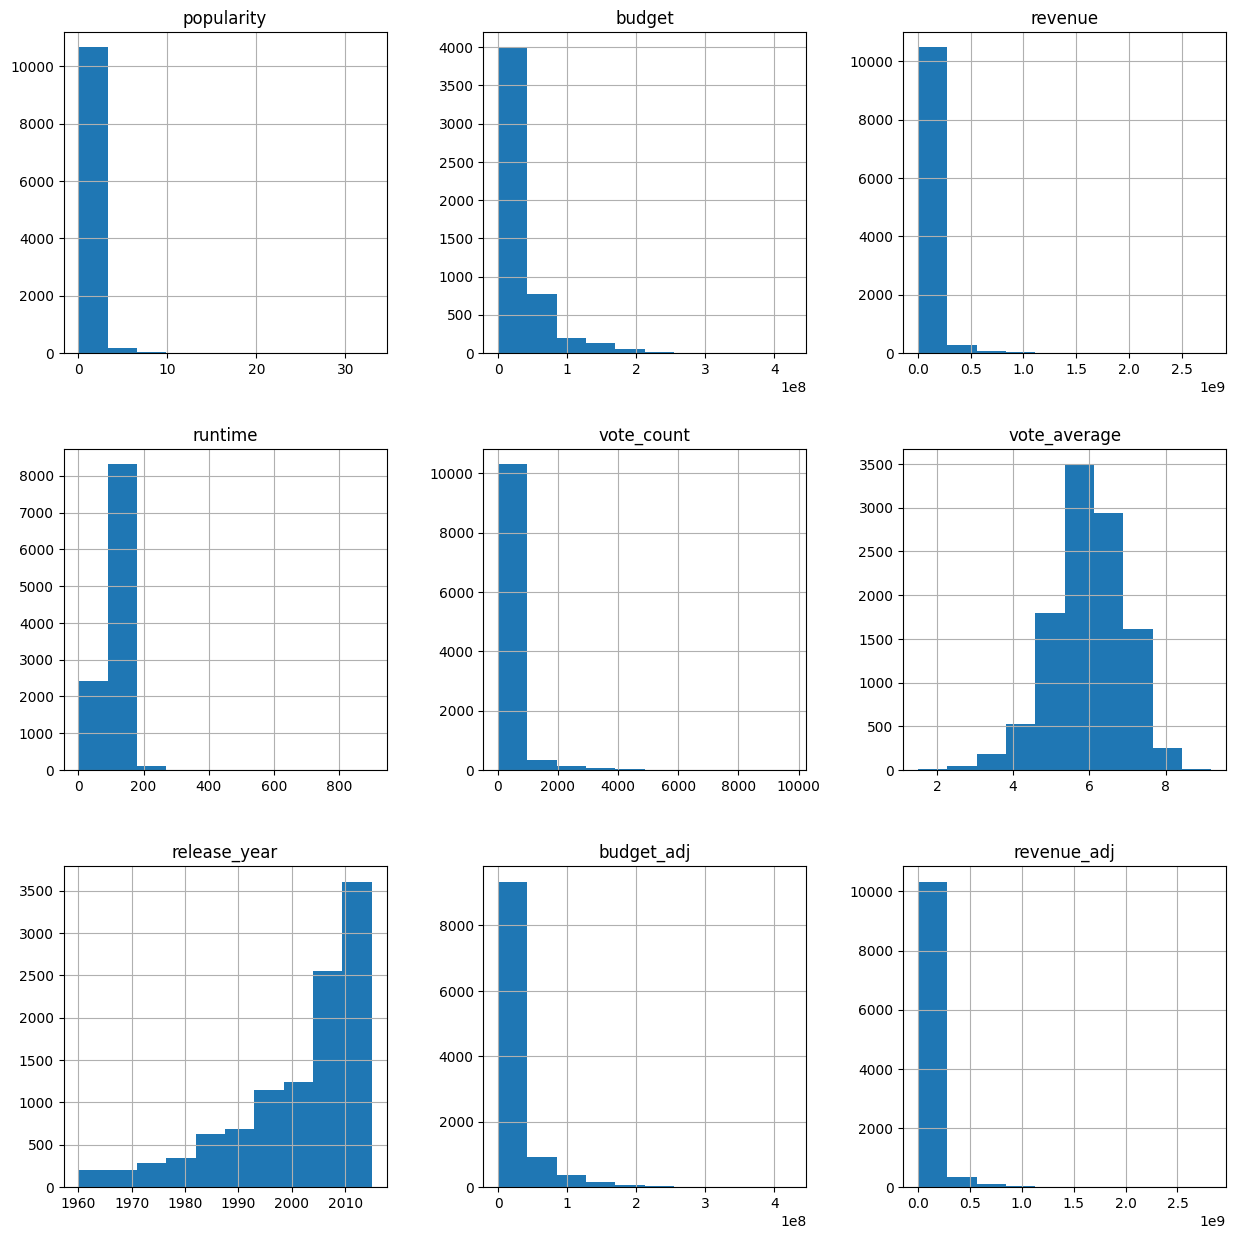

In [118]:
# Trực quan từng dữ liệu
df.hist(figsize=(15,15))

1. Ngân sách cao hơn có nghĩa là mức độ phổ biến cao hơn ? Có mối quan hệ chính thức không ?

Text(0, 0.5, 'popularity')

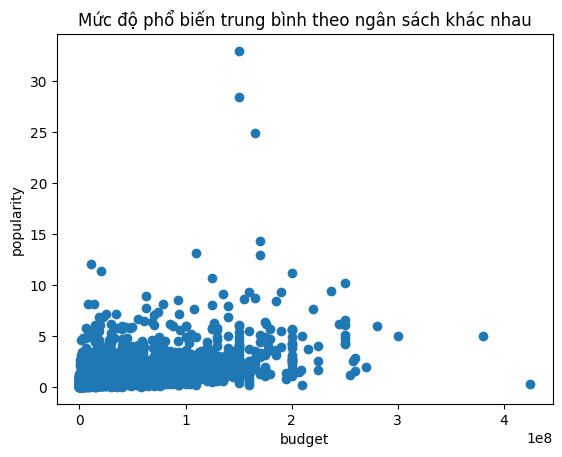

In [119]:
x = df['budget']
y = df['popularity']

plt.scatter(x,y)
plt.title("Mức độ phổ biến trung bình theo ngân sách khác nhau", fontsize=12)
plt.xlabel('budget', fontsize=10)
plt.ylabel('popularity', fontsize=10)

Qua cách hiển thị biểu đồ như trên thì chúng ta không thể thấy mối quan hệ giữa ngân sách và mức độ phổ biến

In [120]:
# Dựa trên giá trị ngân sách trung bình để chia ngân sách thành 2 nhóm: thấp và cao
m = df['budget'].median()
low_budg = df.query('budget < {}'.format(m))
high_budg = df.query('budget >= {}'.format(m))

In [121]:
# Kiểm tra ngân sách thấp và giá trị trung bình ngân sách cao
mean_popularity_of_low_budget = low_budg['popularity'].mean()
mean_popularity_of_high_budget = high_budg['popularity'].mean()

Text(0, 0.5, 'Mức độ phổ biến trung bình')

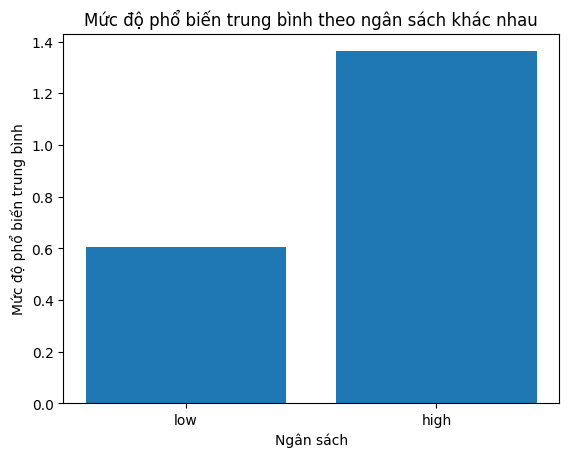

In [122]:
# Tạo biểu đồ thanh với các giá trị đã nhận được ở trên

locations = [1,2]
height = [mean_popularity_of_low_budget, mean_popularity_of_high_budget]
labels = ['low', 'high']
plt.bar(locations, height, tick_label = labels)
plt.title('Mức độ phổ biến trung bình theo ngân sách khác nhau')
plt.xlabel('Ngân sách')
plt.ylabel('Mức độ phổ biến trung bình')

In [123]:
increase_percentage = (mean_popularity_of_high_budget - mean_popularity_of_low_budget) / mean_popularity_of_high_budget * 100
increase_percentage

55.49985502749867

Kết quả Q1: Thông qua biểu đồ trên có thể thấy rằng những bộ phim có kinh phí cao có nhiều khả năng độ phổ biến cao hơn. Có thể đưa ra kết luận phim có kinh phí cao hơn nhận được mức độ phổ biến hơn 50% so với kinh phí thấp.

2. Thời gian chạy có ảnh hưởng đến số phiếu bầu và mức độ phổ biến không ?

In [124]:
short = df.query('runtime < {}'.format(100))
medium = df.query('runtime < {}'.format(200))
long = df.query('runtime > {}'.format(200))

In [125]:
mean_popularity_of_short = short['popularity'].mean()
mean_popularity_of_medium = medium['popularity'].mean()
mean_popularity_of_long = long['popularity'].mean()

Text(0, 0.5, 'Mức độ phổ biến')

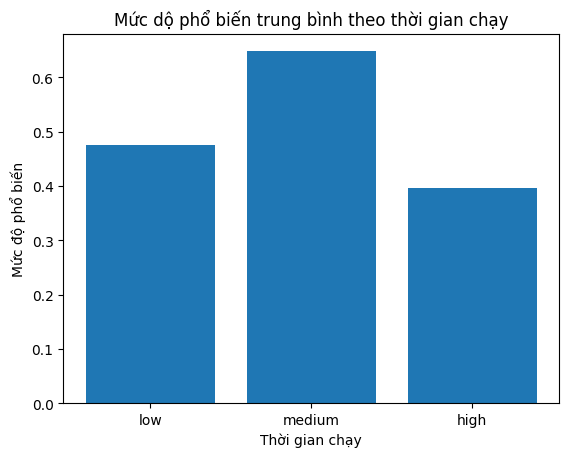

In [126]:
locations = [1,2,3]
heights = [mean_popularity_of_short, mean_popularity_of_medium, mean_popularity_of_long]
labels = ['low', 'medium', 'high']
plt.bar(locations, heights,tick_label=labels)
plt.title('Mức dộ phổ biến trung bình theo thời gian chạy')
plt.xlabel('Thời gian chạy')
plt.ylabel('Mức độ phổ biến')

Phim không quá dài hoặc quá ngắn. Độ dài phim trung bình đạt được mức độ phổ biến nhất. Tuy nhiên biểu đồ thanh không cho thấy được thời gian nào sẽ được mức độ phổ biến tốt nhất

Text(0, 0.5, 'Mức độ phổ biến')

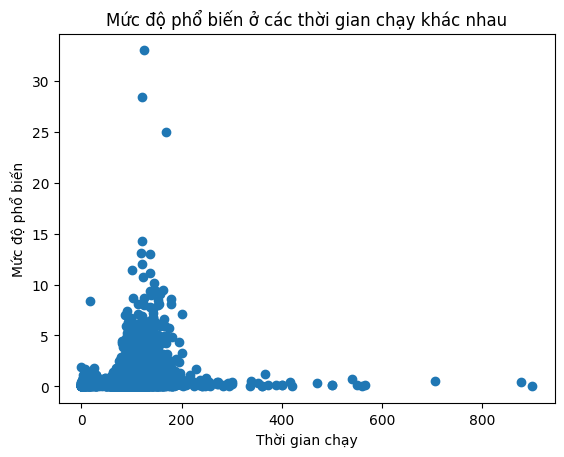

In [127]:
x = df['runtime']
y = df['popularity']

plt.scatter(x,y);
plt.title('Mức độ phổ biến ở các thời gian chạy khác nhau');
plt.xlabel('Thời gian chạy')
plt.ylabel('Mức độ phổ biến')

Kết luận Q2: Kết luận qua 2 biểu đồ trên, chúng ta không thể nào kết luận rằng thời gian chạy phim càng dài thì phim càng ăn khách. Nếu các bộ phim có thời gian chạy trong vòng 200 phút thì mức độ ăn khách cao hơn với những bộ phim có thời gian chạy hơn 200 phút

Q3: Mức độ phổ biến cao hơn có nghĩa lợi nhuận cao hơn ?

In [85]:
m_popularity = df['popularity'].median()
lower_popularity = df.query('popularity < {}'.format(m_popularity))
higher_popularity = df.query('popularity >= {}'.format(m_popularity))

In [84]:
# Tạo thêm một cột lợi nhuận. Lợi nhuận = Doanh thu  - Ngân sách
df['profit'] = df['revenue'] - df['budget']
# df['profit'].head(20)
df.head()

popularity       budget     revenue                original_title  \
0   32.985763  150000000.0  1513528810                Jurassic World   
1   28.419936  150000000.0   378436354            Mad Max: Fury Road   
2   13.112507  110000000.0   295238201                     Insurgent   
3   11.173104  200000000.0  2068178225  Star Wars: The Force Awakens   
4    9.335014  190000000.0  1506249360                     Furious 7   

                                                cast          director  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   Colin Trevorrow   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...     George Miller   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...  Robert Schwentke   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...       J.J. Abrams   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...         James Wan   

                         tagline  \
0              The park is open.   
1             What a Lovely Day.   
2     One Choice Can Destroy You   
3  Every generation has a story.   
4            Vengeance Hits Home   

                                            keywords  runtime  \
0  monster|dna|tyrannosaurus rex|velociraptor|island      124   
1   future|chase|post-apocalyptic|dystopia|australia      120   
2  based on novel|revolution|dystopia|sequel|dyst...      119   
3              android|spaceship|jedi|space opera|3d      136   
4                car race|speed|revenge|suspense|car      137   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   
3   Action|Adventure|Science Fiction|Fantasy   
4                      Action|Crime|Thriller   

                                production_companies release_date  vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15        5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15        6185   
2  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15        2480   
3          Lucasfilm|Truenorth Productions|Bad Robot     12/15/15        5292   
4  Universal Pictures|Original Film|Media Rights ...       4/1/15        2947   

   vote_average  release_year    budget_adj   revenue_adj        profit  
0           6.5          2015  1.379999e+08  1.392446e+09  1.363529e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  2.284364e+08  
2           6.3          2015  1.012000e+08  2.716190e+08  1.852382e+08  
3           7.5          2015  1.839999e+08  1.902723e+09  1.868178e+09  
4           7.3          2015  1.747999e+08  1.385749e+09  1.316249e+09

In [128]:
# Lợi nhuận trung bình cho mức độ phổ biến thấp và mức độ phổ biến cao
mean_profit_of_low_popularity = lower_popularity['profit'].mean()
mean_profit_of_high_popularity = higher_popularity['profit'].mean()

Text(0, 0.5, 'Lợi nhuận trung bình')

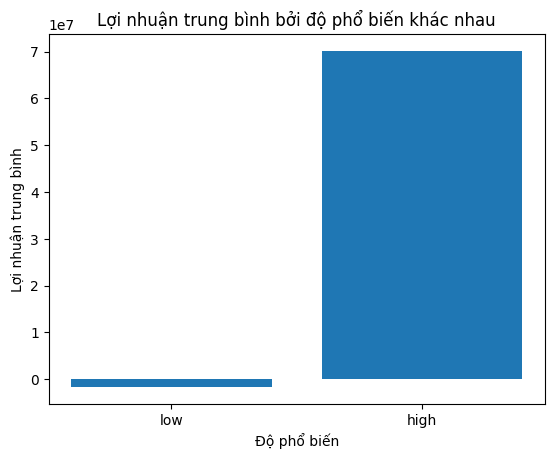

In [130]:
locations = [1,2]
heights = [mean_profit_of_low_popularity, mean_profit_of_high_popularity]
labels = ['low','high']
plt.bar(locations, heights, tick_label= labels)
plt.title('Lợi nhuận trung bình bởi độ phổ biến khác nhau')
plt.xlabel('Độ phổ biến')
plt.ylabel('Lợi nhuận trung bình')

Kết luận Q3: Qua biểu đồ cho thấy, nếu độ phổ biến cao thì lợi nhuận càng cao

1. Những tính năng nào liên quan đến 10 bộ phim có doanh thu hàng đầu ?

array([[<AxesSubplot: title={'center': 'popularity'}>,
        <AxesSubplot: title={'center': 'budget'}>,
        <AxesSubplot: title={'center': 'revenue'}>],
       [<AxesSubplot: title={'center': 'runtime'}>,
        <AxesSubplot: title={'center': 'vote_count'}>,
        <AxesSubplot: title={'center': 'vote_average'}>],
       [<AxesSubplot: title={'center': 'release_year'}>,
        <AxesSubplot: title={'center': 'budget_adj'}>,
        <AxesSubplot: title={'center': 'revenue_adj'}>]], dtype=object)

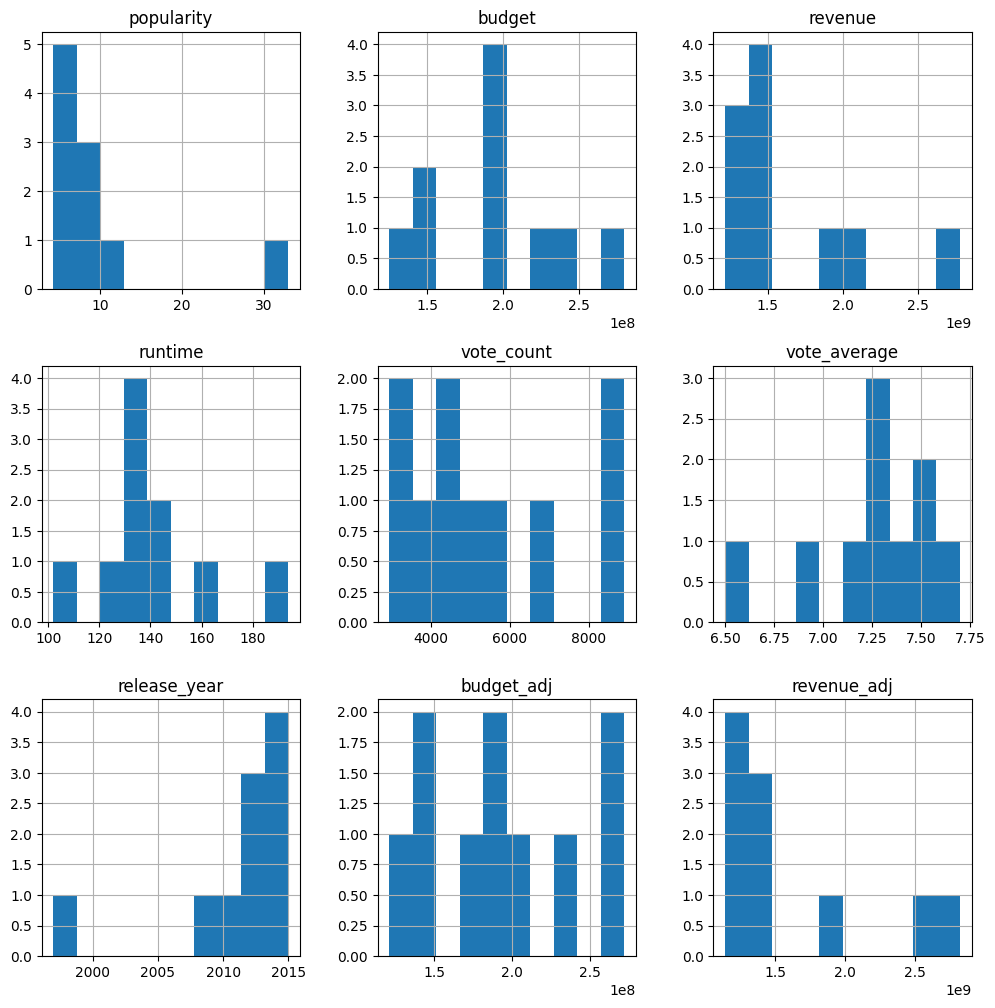

In [129]:
top10_revenue = df.nlargest(10,'revenue')
top10_revenue.hist(figsize=(12,12))

Có một số đặc điểm chúng ta có thể kết luận từ 10 bộ phim hàng đầu, thời gian phim từ 100 phút đến 200 phút, năm phát hành phim từ 1995 đến 2015

1. Những thể loại nào được yêu thích từ năm này qua năm khác

In [132]:
# Hàm để cung cấp tất cả các danh mục
def extract_data(column_name):
	data = df[column_name].str.cat(sep='|')
	data = pd.Series(data.split('|'))

	count = data.value_counts(ascending=False)
	return count

Text(0, 0.5, 'Thể loại')

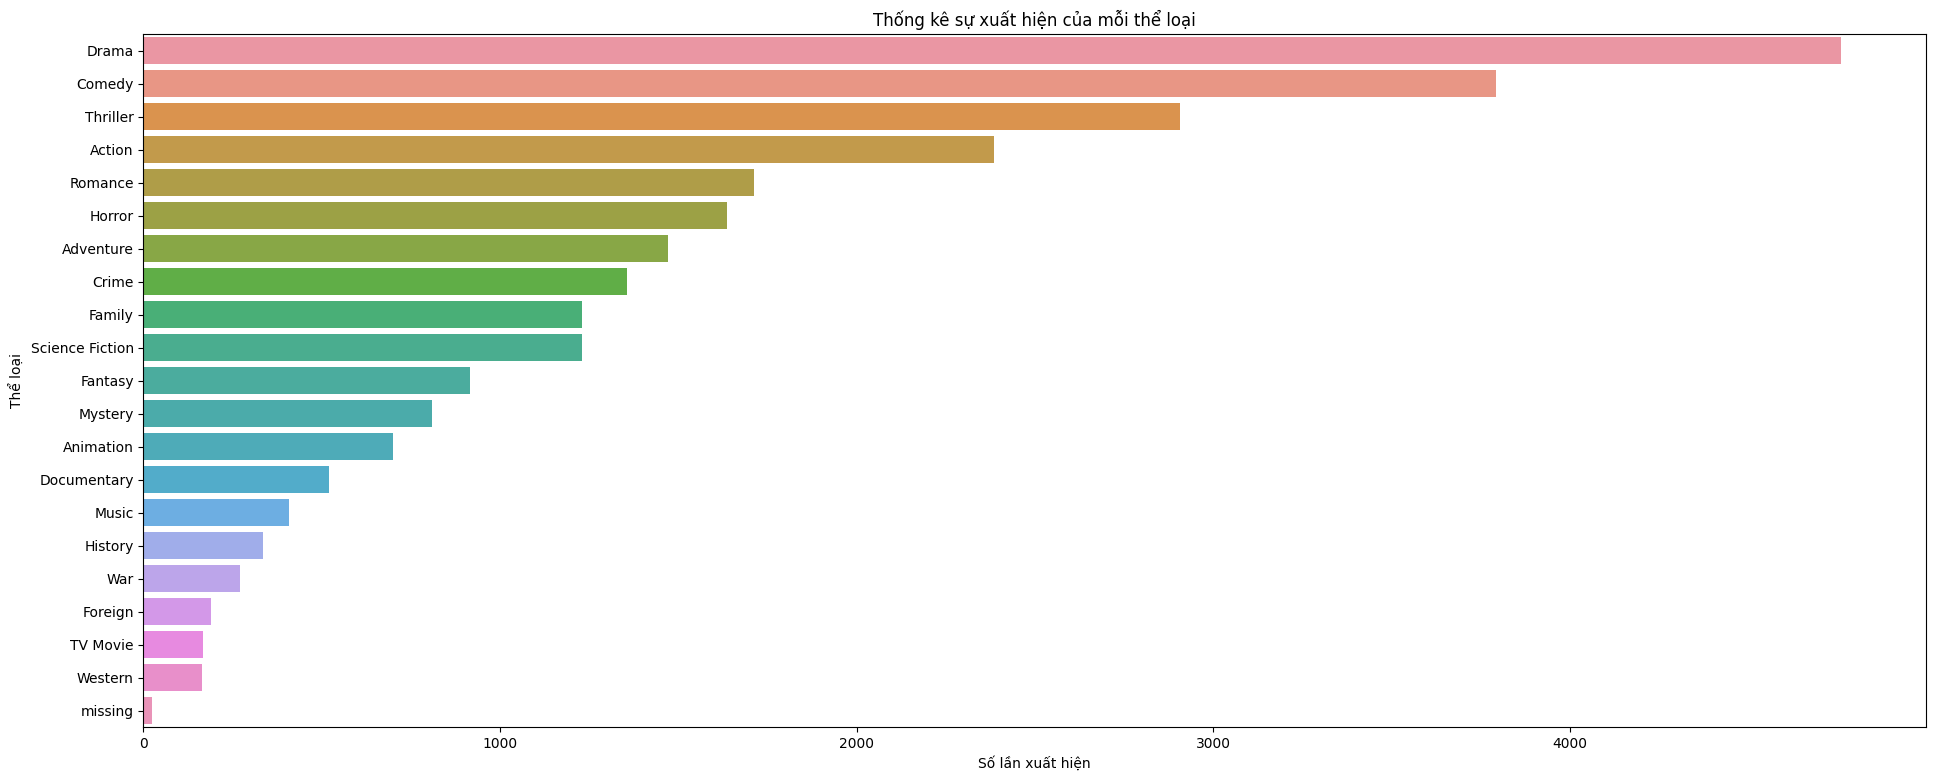

In [133]:
genre_count = extract_data('genres')
genre_count

df_genre_counts = pd.DataFrame({'genres':genre_count.index, 'count': genre_count.values})

f, ax = plt.subplots(figsize=(23,9))
sns.barplot(x = 'count', y='genres', data=df_genre_counts)
ax.set_title('Thống kê sự xuất hiện của mỗi thể loại')
ax.set_xlabel('Số lần xuất hiện')
ax.set_ylabel('Thể loại')

In [134]:
director_count = extract_data('director')
director_count

Woody Allen         46
missing             44
Clint Eastwood      34
Martin Scorsese     31
Steven Spielberg    30
                    ..
Mike Maguire         1
Tom Kuntz            1
John Simpson         1
Simon Hunter         1
Harold P. Warren     1
Length: 5363, dtype: int64

Text(0, 0.5, 'Số lượng phim')

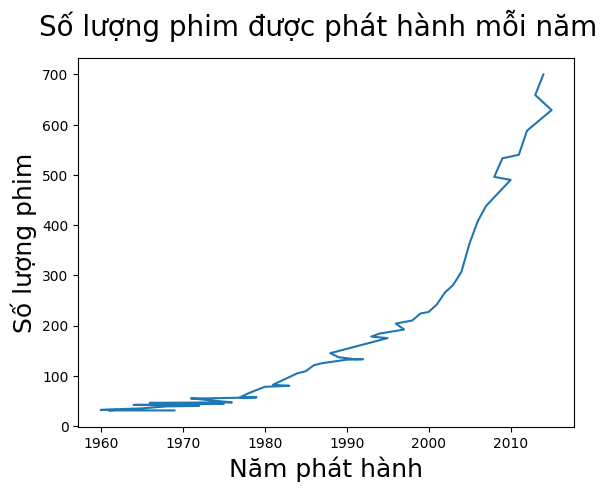

In [139]:
movie_count = df['release_year'].value_counts()
fig = plt.figure()
plt.plot(movie_count)
fig.suptitle('Số lượng phim được phát hành mỗi năm', fontsize=20)
plt.xlabel('Năm phát hành', fontsize=18)
plt.ylabel('Số lượng phim', fontsize=18)

Text(470.72222222222223, 0.5, 'Thể loại')

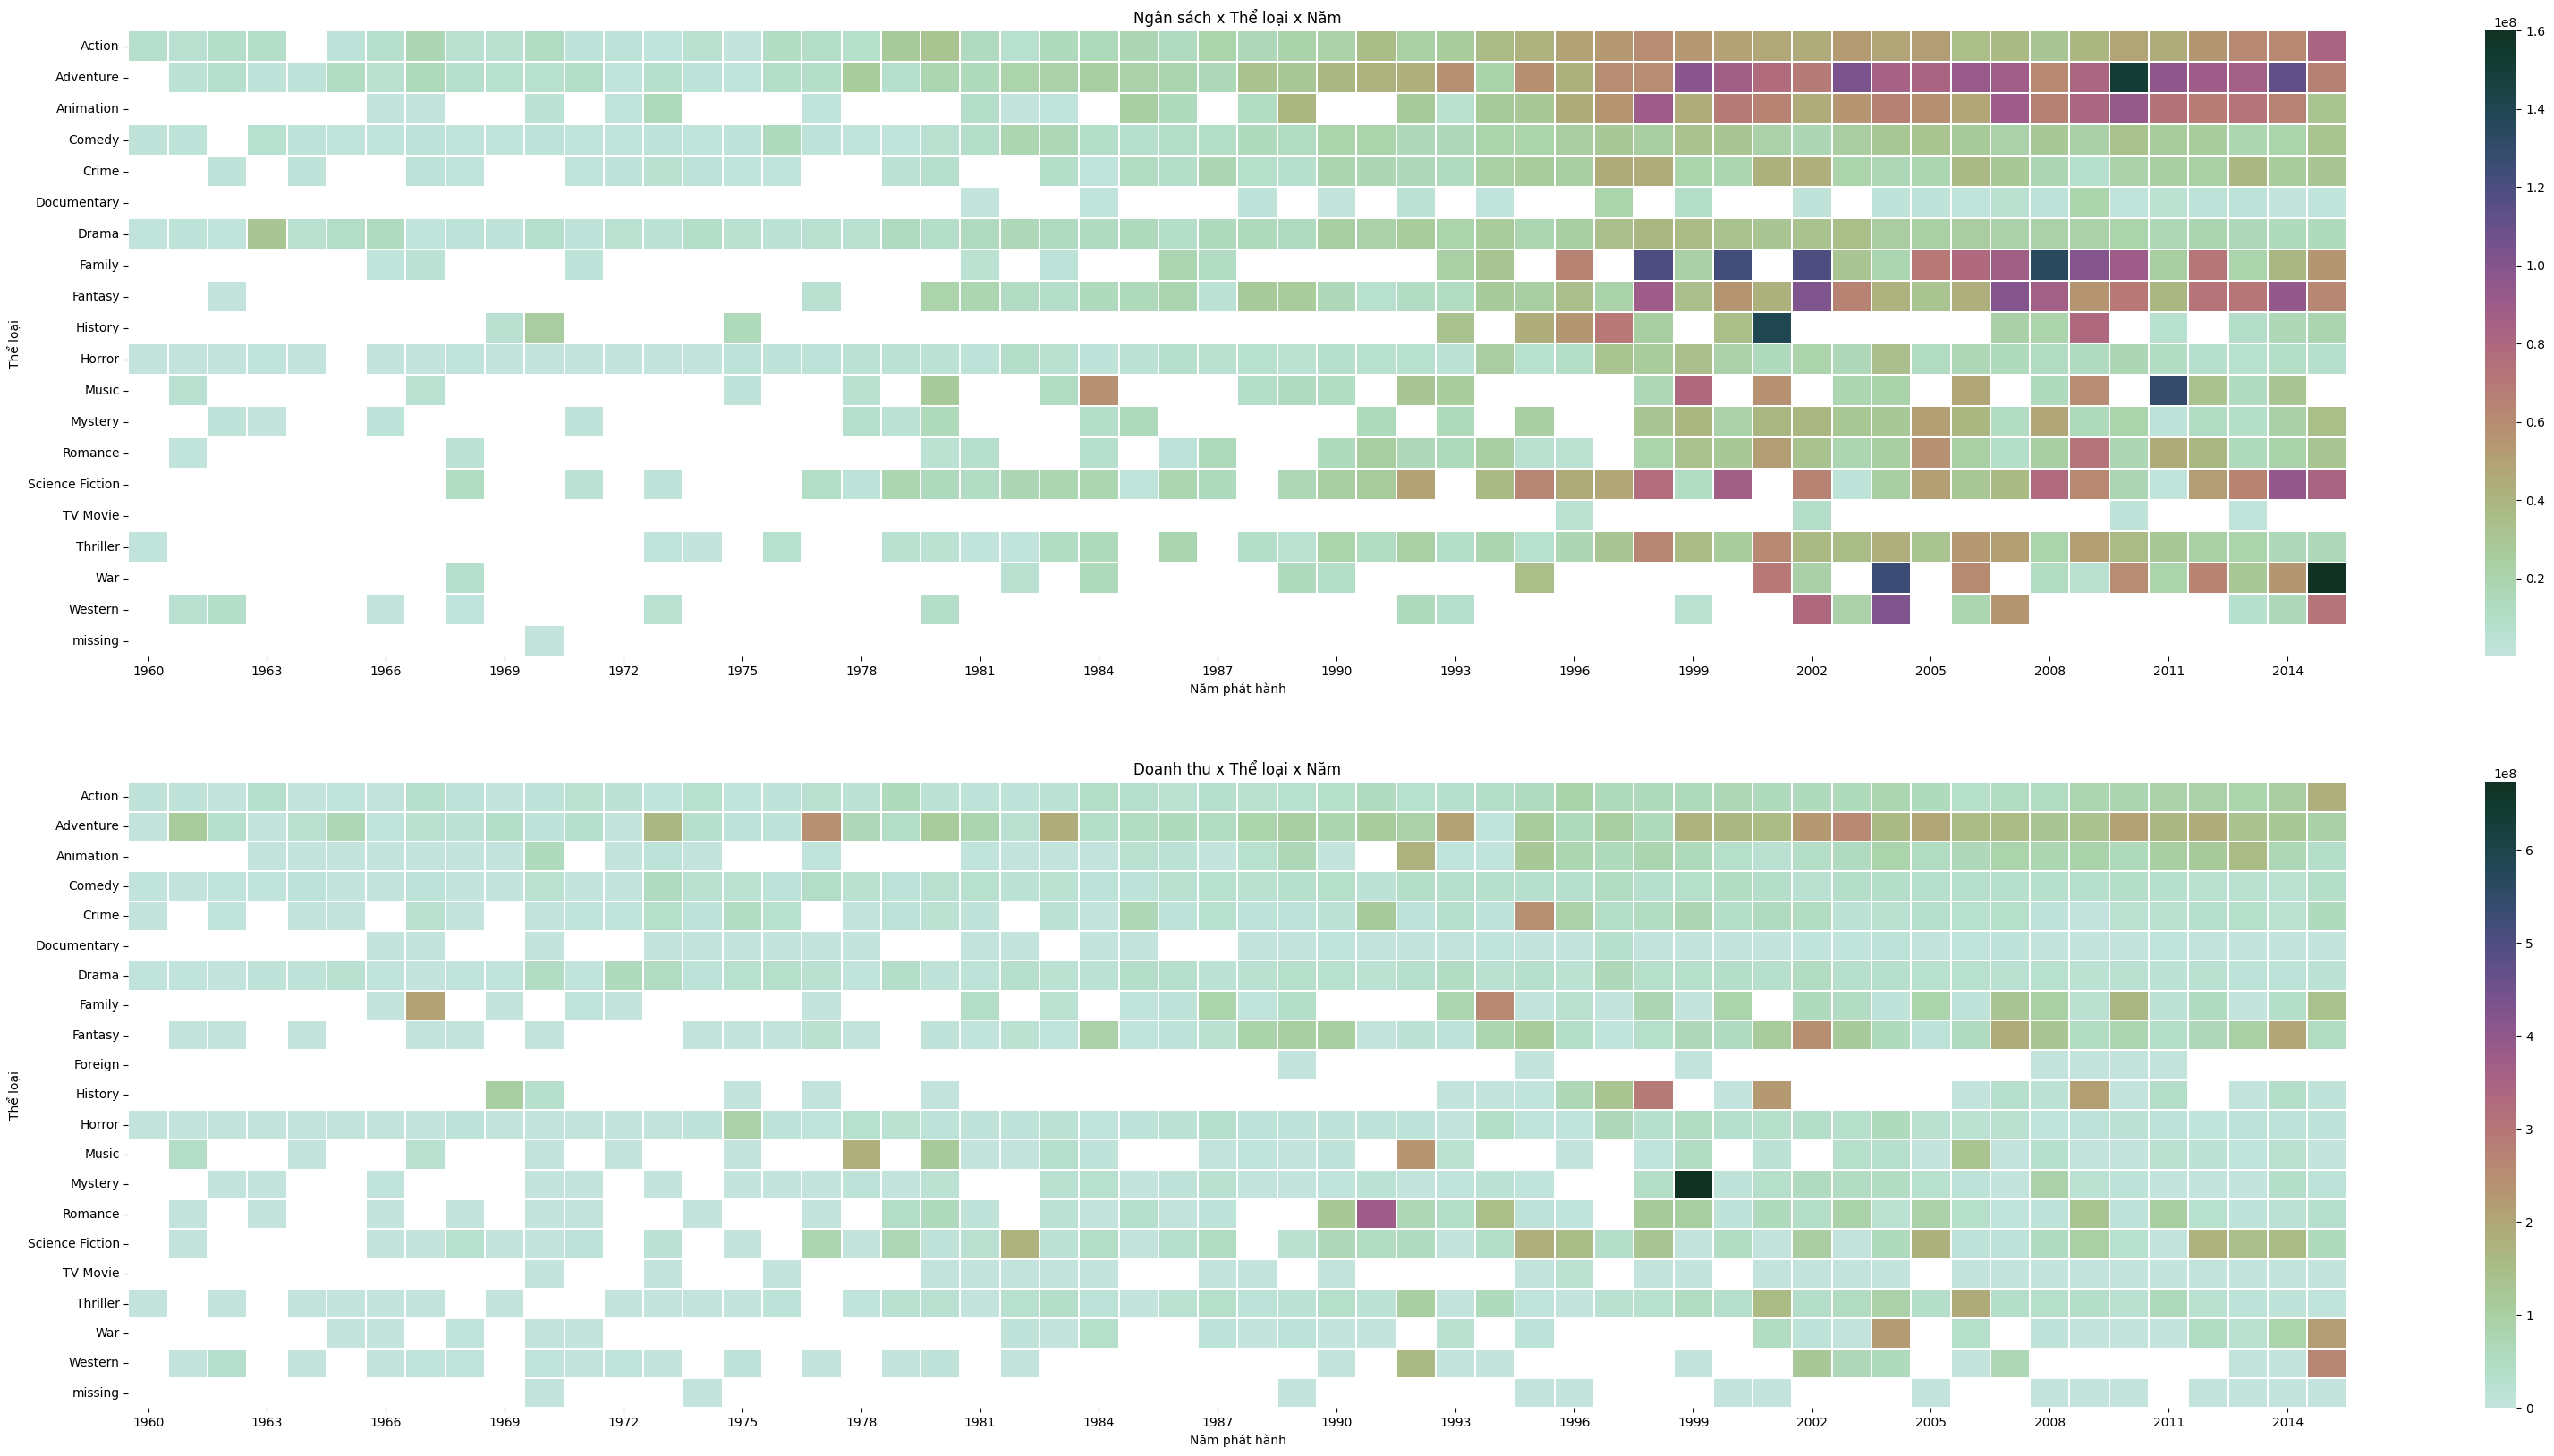

In [152]:
# Hiển thị doanh thu và ngân sách cho từng loại thể loại mỗi năm
# Trước tiên sẽ lấy thể loại đầu tiên cho mỗi phim thay vì kết hợp thể loại

df['genre'] = df['genres'].apply(lambda x:x.split('|')[0])

# Phát họa tất cả các loại thể loại cho mỗi năm với ngân sách và doanh thu
genre_year = df.groupby(['genre', 'release_year']).mean().sort_index()
df_gyBudget = genre_year.pivot_table(index = ['genre'], columns = ['release_year'], values ='budget', aggfunc=np.mean)
df_gyBudget = genre_year.pivot_table(index=['genre'],columns=['release_year'], values='budget', aggfunc=np.mean)

df_gyGross = genre_year.pivot_table(index=['genre'], columns=['release_year'], values='revenue', aggfunc=np.mean)
f, [axA, axB] = plt.subplots(figsize=(40,20), nrows=2)
cmap = sns.cubehelix_palette(start=1.5, rot=1.5, as_cmap=True)
sns.heatmap(df_gyBudget, xticklabels=3, cmap=cmap, linewidths=0.05, ax=axA)
sns.heatmap(df_gyGross, xticklabels=3, cmap=cmap, linewidths=0.05, ax=axB)
axA.set_title('Ngân sách x Thể loại x Năm')
axA.set_xlabel('Năm phát hành')
axA.set_ylabel('Thể loại')

axB.set_title('Doanh thu x Thể loại x Năm')
axB.set_xlabel('Năm phát hành')
axB.set_ylabel('Thể loại')


Kết luận:

Dựa trên phân tích đã làm ở trên, có thể đưa ra những tóm tắt sau:
1. Số lượng và phạm vi phim ngày càng lớn, có nhiều lựa chọn hơn để chọn làm khán giả
2. Không thể nói ngân sách cao đảm bảo tính phổ biến cao. Nhưng đối với những bộ phim có kinh phí cao hơn sẽ tạo ra mức độ phổ biến trung bình cao hơn.
3. Để sản xuất bộ phim nổi tiếng hơn, thời gian chạy tốt nhất nên là khoảng 150 phút, Drama, Comedy, Action những thể loại này sẽ được ưu tiên hơn

Hạn chế

1. Có những hạn chế về một số dữ liệu bị thiếu và nhiều số sai có thể ảnh hướng đến quá trình phân tích
2. Khó để biết cách đo lường số lượng vote_counts và mức độ phổ biến
3. Đối với phim nước ngoài, curency không được chỉ định